# Парадокс спящей красавицы

Парадокс представляет собой задачу на расчет вероятности, которая имеет два различных решения, противоречащих друг другу. 

**Испытуемой («Спящей красавице») делается укол снотворного. Бросается симметричная монета. В случае выпадения орла её будят, и эксперимент на этом заканчивается. В случае выпадения решки её будят, делают второй укол (после чего она забывает о пробуждении) и будят на следующий день, не бросая монеты, — в таком случае эксперимент идёт два дня подряд. Вся эта процедура Красавице известна, однако у неё нет информации, в какой день её разбудили. 
Представьте себя на месте Спящей красавицы. Вас разбудили. Какова вероятность того, что монета упала орлом?**

Существует два решения:

1. Нет никакой информации о результате выпадения монеты и предыдущих пробуждениях. Поскольку известно, что монета честная, можно предположить, что вероятность выпадения орла равна 1/2. (Взгляд со стороны экспериментатора)
2. Существует три возможных пробуждения: Понедельник/орёл, Понедельник/решка, Вторник/решка. Все они равновероятны с точки зрения пробуждения. В таком случае вероятность выпадения орла равна 1/3. (Взгляд со стороны Спящей красавицы)

Смоделируем и проанализируем результаты

In [7]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

Будем рассматривать две позиции, когда вероятность 1/2 (halfer) и 1/3 (thirder)

In [89]:
# функция моделирования подхода 1/2
def simulate_halfer(trials):   
    awakenings = []
    for _ in range(trials):
        coin = random.choice(['орел', 'решка'])
        if coin == 'орел':
            awakenings.append('орел')
        else:
            awakenings.append('решка')
    return awakenings

In [90]:
# функция моделирования подхода 1/3
def simulate_thirder(trials):
    awakenings = []
    for _ in range(trials):
        coin = random.choice(['орел', 'решка'])
        if coin == 'орел':
            awakenings.append('орел')
        else: 
            awakenings.append('решка') 
            awakenings.append('решка')  
    
    return awakenings

In [35]:
N = 10000   # кол-во экспериментов

**Результат с точки зрения подхода 1/2**

In [97]:
halfer_awakenings = simulate_halfer(N)
halfer_counts = Counter(halfer_awakenings)

total_halfer = len(halfer_awakenings)
heads_halfer = halfer_counts.get('орел', 0)
tails_halfer = halfer_counts.get('решка', 0)

print(f"Всего бросков монеты: {N}")
print(f"Выпадение орла: {heads_halfer}")
print(f"Выпадение решки: {tails_halfer}")
print(f"Вероятность орла: {heads_halfer/total_halfer:.4f}")
print(f"Теоретическое значение: 1/2 = 0.5")

Всего бросков монеты: 10000
Выпадение орла: 4887
Выпадение решки: 5113
Вероятность орла: 0.4887
Теоретическое значение: 1/2 = 0.5


Text(0.5, 1.0, 'Pаспределение пробуждений')

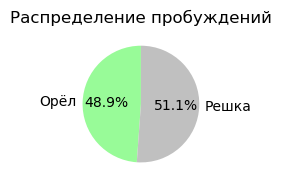

In [98]:
plt.subplot(2, 3, 1)
plt.pie([heads_halfer, tails_halfer], labels=['Орёл', 'Решка'], autopct='%1.1f%%', 
        colors=['palegreen', 'silver'], startangle=90)
plt.title('Pаспределение пробуждений')

**Результат с точки зрения подхода 1/3**

In [99]:
thirder_awakenings = simulate_thirder(N)
thirder_counts = Counter(thirder_awakenings)

total_thirder = len(thirder_awakenings)
heads_thirder = thirder_counts.get('орел', 0)
tails_thirder = thirder_counts.get('решка', 0)

print(f"Всего пробуждений: {total_thirder}")
print(f"Пробуждений после орла: {heads_thirder}")
print(f"Пробуждений после решки: {tails_thirder}")
print(f"Вероятность орла при пробуждении: {heads_thirder/total_thirder:.4f}")
print(f"Теоретическое значение: 1/3 ≈ 0.3333")

Всего пробуждений: 15046
Пробуждений после орла: 4954
Пробуждений после решки: 10092
Вероятность орла при пробуждении: 0.3293
Теоретическое значение: 1/3 ≈ 0.3333


Text(0.5, 1.0, 'Pаспределение пробуждений')

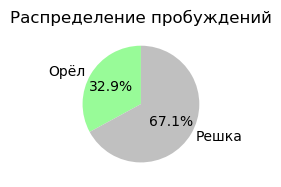

In [100]:
plt.subplot(2, 3, 1)
plt.pie([heads_thirder, tails_thirder], labels=['Орёл', 'Решка'], autopct='%1.1f%%', 
        colors=['palegreen', 'silver'], startangle=90)
plt.title('Pаспределение пробуждений')

**Сравним теоретические вероятности с полученными значениями**

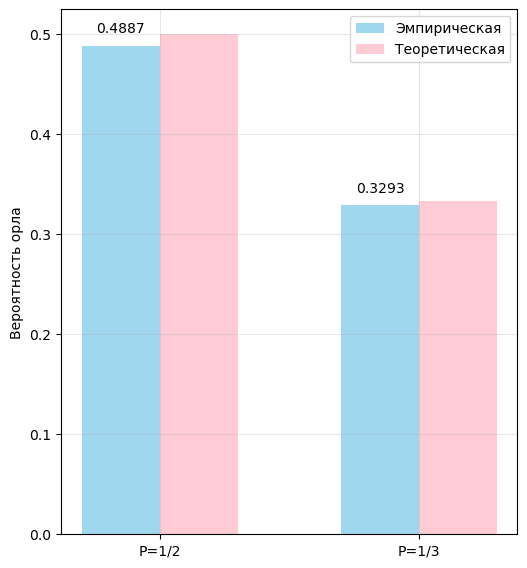

In [101]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
models = ['P=1/2', 'P=1/3']
empirical_probs = [heads_halfer/total_halfer, heads_thirder/total_thirder]
theoretical_probs = [0.5, 1/3]

x = np.arange(len(models))
width = 0.3

bars1 = plt.bar(x - width/2, empirical_probs, width, 
                label='Эмпирическая', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, theoretical_probs, width, 
                label='Теоретическая', alpha=0.8, color='pink')

plt.ylabel('Вероятность орла')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, val in zip(bars1, empirical_probs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.4f}', 
             ha='center', va='bottom', fontsize=10)

**Рассмотрим как распределяются пробуждения при выпадении орла/решки при разных подходах**

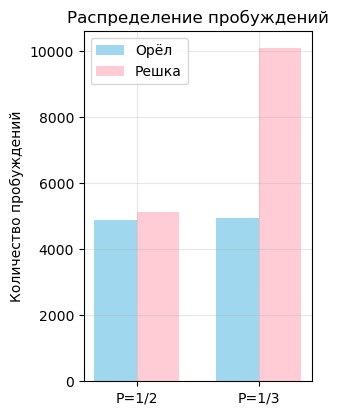

In [106]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
labels = ['P=1/2', 'Р=1/3']
heads_values = [heads_halfer, heads_thirder]
tails_values = [tails_halfer, tails_thirder]

x = np.arange(len(labels))
width = 0.35

plt.bar(x - width/2, heads_values, width,
        label= 'Орёл', alpha=0.8, color='skyblue')
plt.bar(x + width/2, tails_values, width,
        label='Pешка', alpha=0.8, color='pink')

plt.ylabel('Количество пробуждений')
plt.title('Распределение пробуждений')
plt.xticks(x, labels)
plt.legend()
plt.grid(True, alpha=0.3)

Таким образом, оба ответа логически обоснованы, но дают разные вероятности.

Парадокс возникает из-за неточности вопроса.

Если вопрос: **Какова вероятность того, что монета выпала орлом?** То это вопрос об исходе броска монеты. И ответ будет **1/2**.

Если вопрос: **Какова вероятность того, что монета выпала орлом, если вы проснулись в любое из двух пробуждений?** В этом вопросе содержится условие "вы сейчас проснулись". И ответ **1/3**.